# 7. Desicion Tree (결정 트리)

### 의사 결정 트리 (DesicionTree)

##### 특징 : 설명이 쉬운 알고리즘 -> 모양의 해석이 쉽다 + 범주형 데이터에 적용이 쉬운 모델
##### 단점 : 예측력이 다른 지도 학습 모형에 비해 떨어짐

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import tree

In [5]:
iris = load_iris()

In [6]:
df = pd.DataFrame(np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

In [136]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


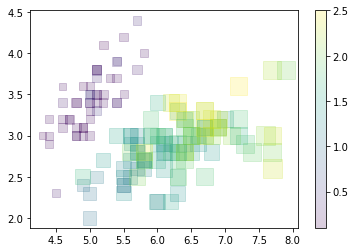

In [165]:
plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, s=50*df.iloc[:, 2], c=df.iloc[:, 3], alpha=0.2, marker='s')

plt.colorbar()

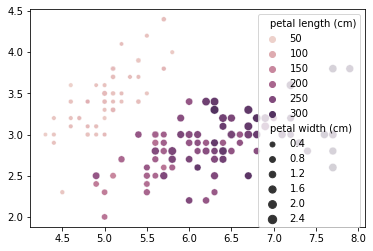

In [167]:
sns.scatterplot(x=df.iloc[:, 0].values, 
                y=df.iloc[:, 1].values, 
                hue=50*df.iloc[:, 2],
                size=df.iloc[:, 3],
                data=iris)
plt.show()

In [145]:
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values

In [127]:
# 테스트, 훈련 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [128]:
# # 데이터 스케일링(표준화)
# sc = StandardScaler()
# sc.fit(X_train)

# X_train_std = sc.transform(X_train)
# y_train_std = sc.transform(X_test)

In [129]:
# 결정 트리 생성 (max_depth = 3일때와 min_sample_split=4 일때)
# iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=156)

In [130]:
# 훈련데이터 학습
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4,
                       random_state=156)

In [131]:
from sklearn.metrics import accuracy_score
y_pred = iris_tree.predict(X_test)
print(accuracy_score(y_test, y_pred))
# 테스트 데이터와 예측값이 얼마나 정확하게 떨어지는지 확인
print(iris_tree.score(X_train, y_train))
# 학습된 모델 점수 평가

0.9
0.9916666666666667


In [132]:
# 예측값
y_pred

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype=object)

### 시각화(using graphviz)

In [133]:
from sklearn.tree import export_graphviz
## 시각화 결과를 tree.dot 파일로 저장
export_graphviz(iris_tree, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

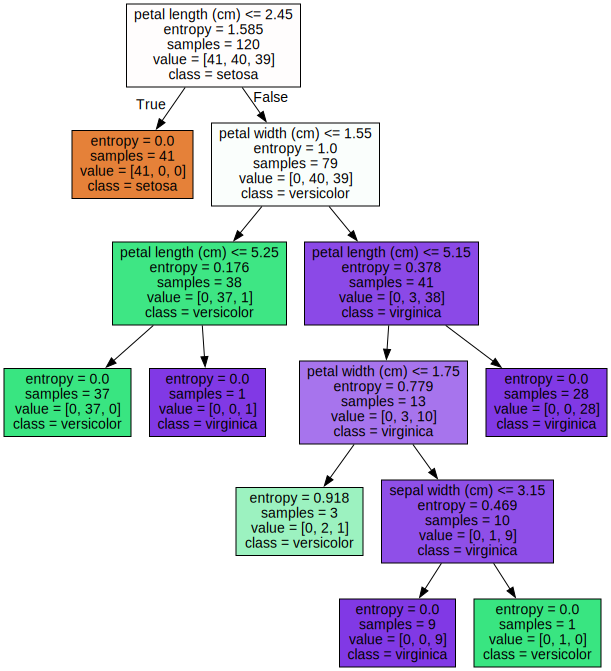

In [134]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 각 Feature 선택의 중요도

Feature importances:
[0.    0.025 0.657 0.318]
sepal length (cm) : 0.000
sepal width (cm) : 0.025
petal length (cm) : 0.657
petal width (cm) : 0.318


<AxesSubplot:>

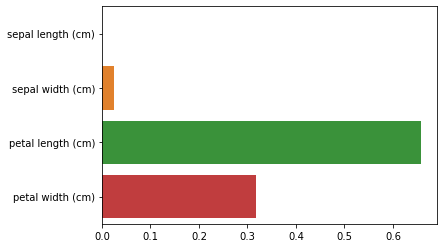

In [135]:
import seaborn as sns
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(iris_tree.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , iris_tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=iris_tree.feature_importances_ , y=iris.feature_names)